In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('traintitanic.csv')

# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no missing values left
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [4]:
# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

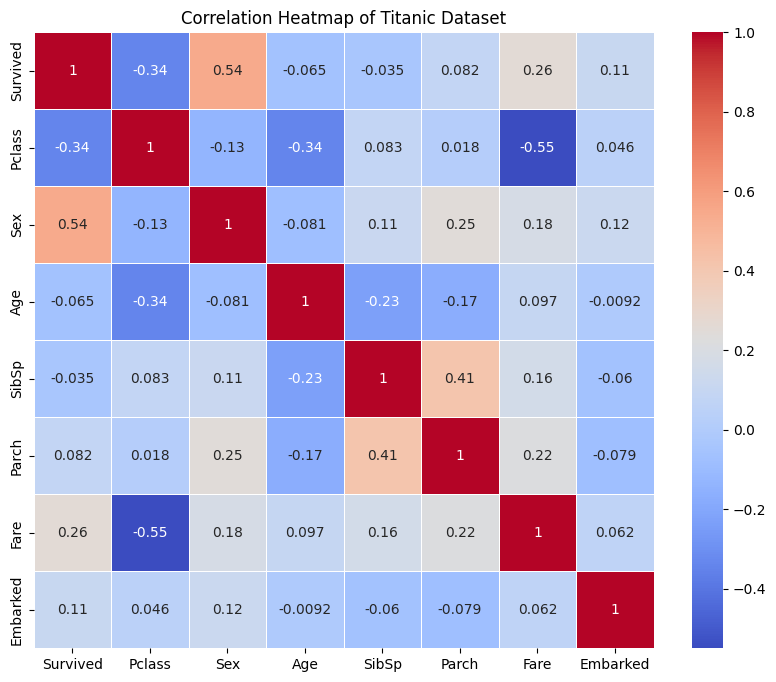

In [5]:
# Compute correlation matrix
corr = df.corr()

# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

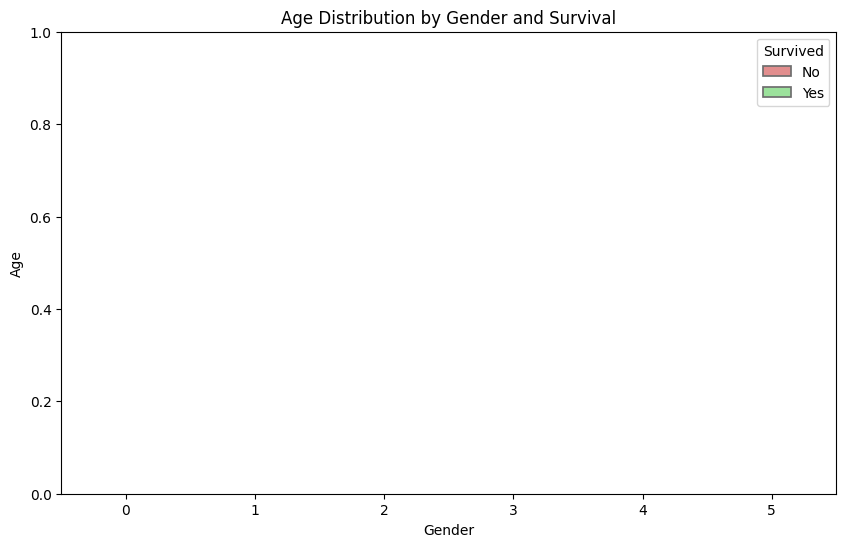

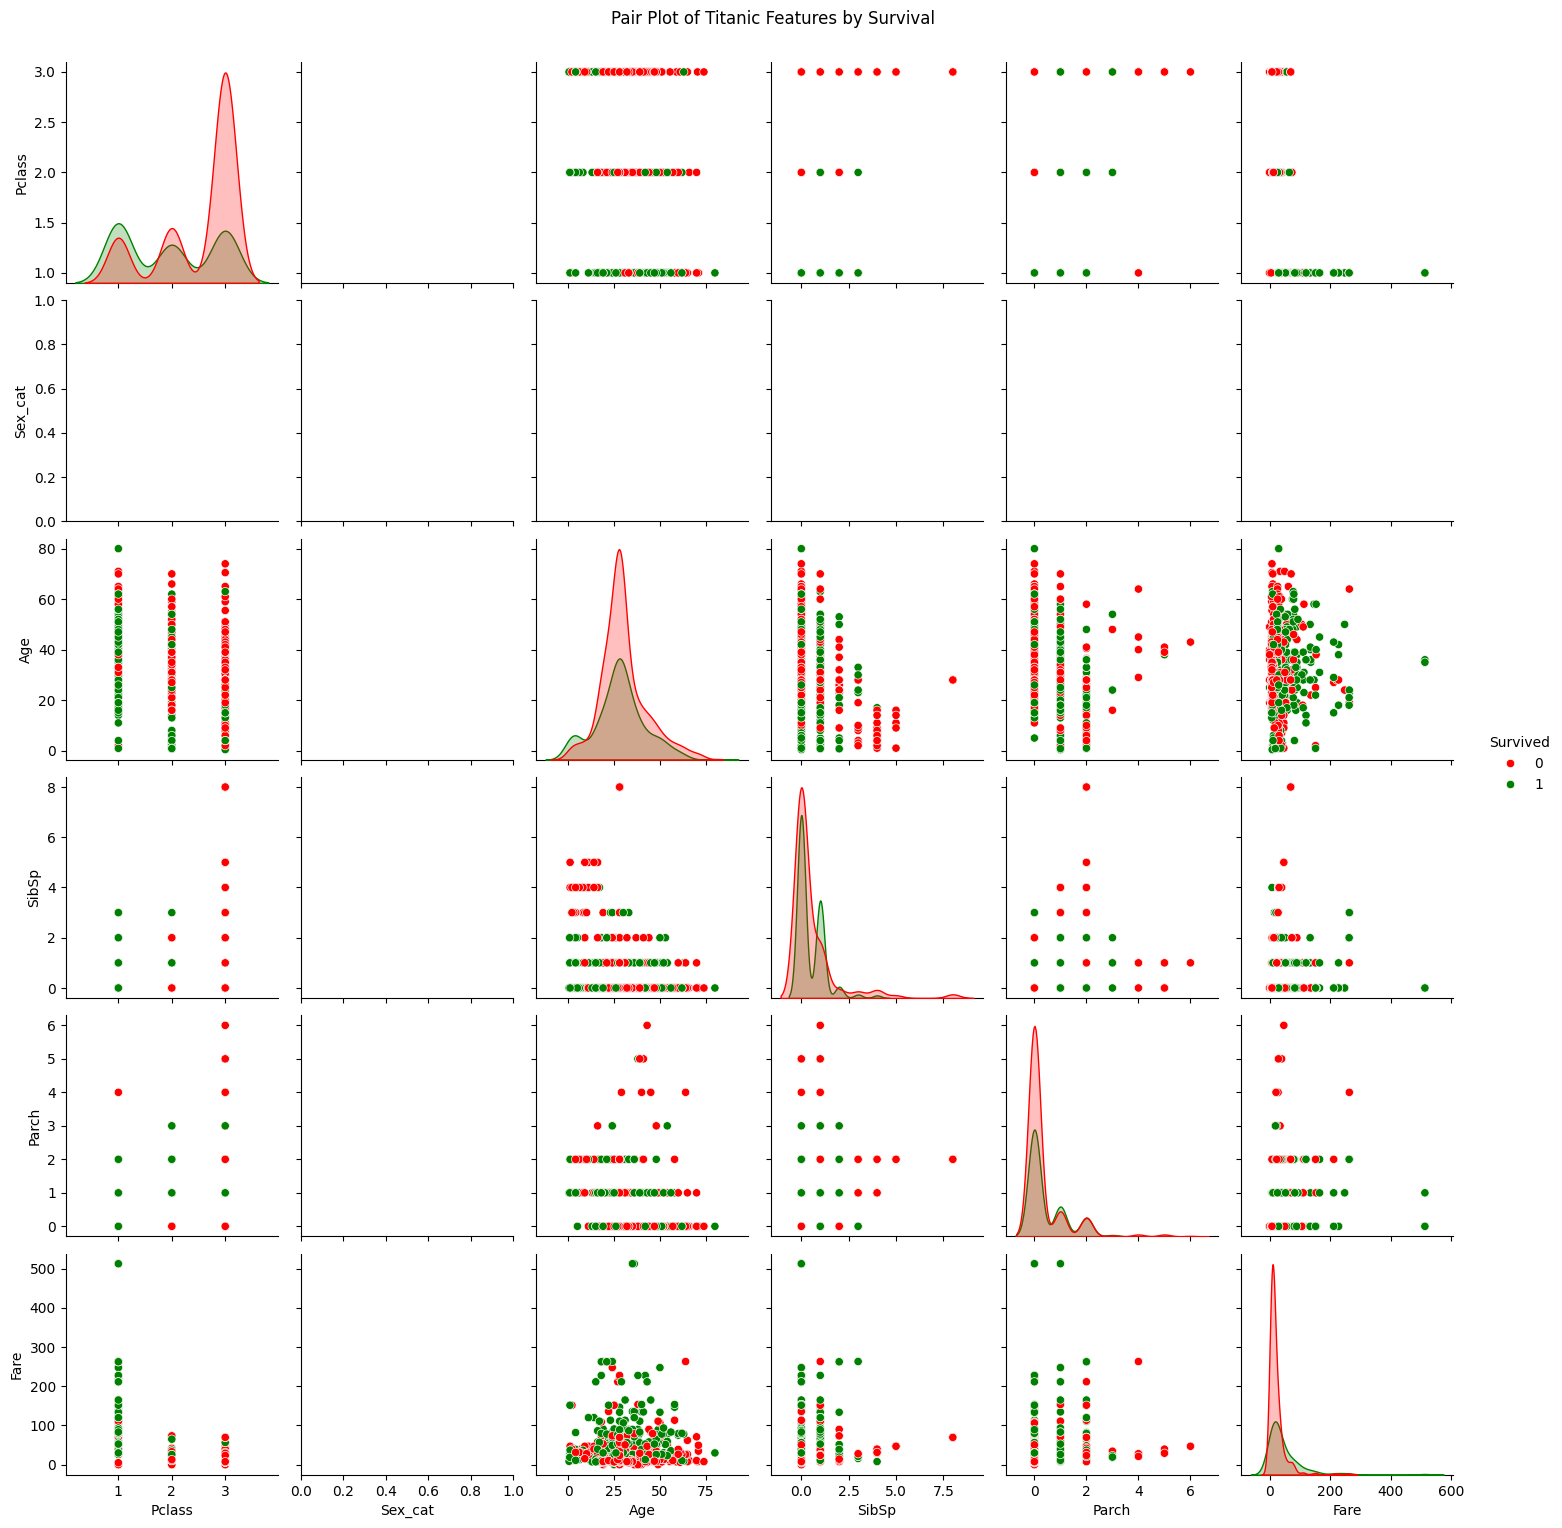

In [3]:
# Convert 'Sex' back to categorical labels for better readability
df['Sex_cat'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# Plotting
plt.figure(figsize=(10,6))
sns.violinplot(x='Sex_cat', y='Age', hue='Survived', data=df, split=True, palette={0:'lightcoral', 1:'lightgreen'})
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Selecting relevant features
sns.pairplot(df[['Survived', 'Pclass', 'Sex_cat', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette={0:'red', 1:'green'}, diag_kind='kde')
plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
plt.show()